# **Basic Libraries & Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/exchange_rate.csv',header=0,index_col=0)

In [ ]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 376.6+ KB


In [ ]:
df['Ex_rate']=df['Ex_rate'].interpolate(method='linear')

In [ ]:
upper_limit=df['Ex_rate'].quantile(0.99)
lower_limit=df['Ex_rate'].quantile(0.01)

In [ ]:
df['Ex_rate'] =  np.where(df['Ex_rate'] > upper_limit, upper_limit,
                          np.where(df['Ex_rate'] < lower_limit, lower_limit, df['Ex_rate']))

<Axes: ylabel='Density'>

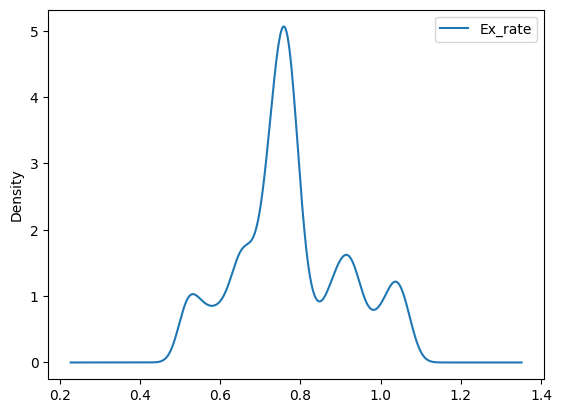

In [ ]:
df.plot(kind='kde')

# Visualization


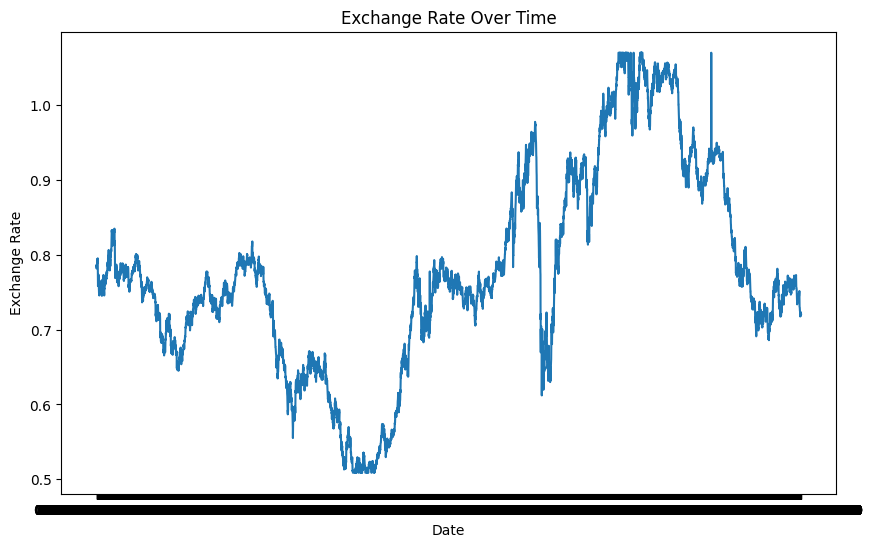

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

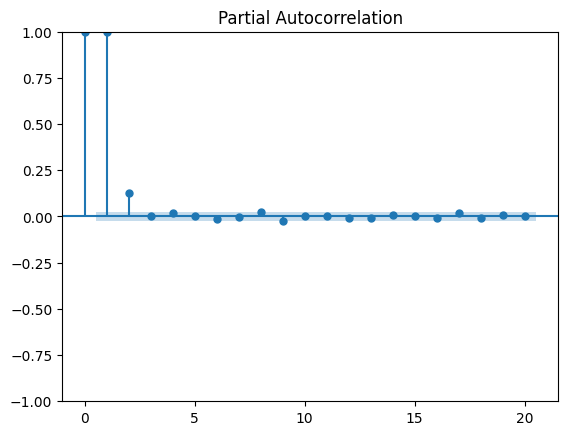

<Figure size 1000x900 with 0 Axes>

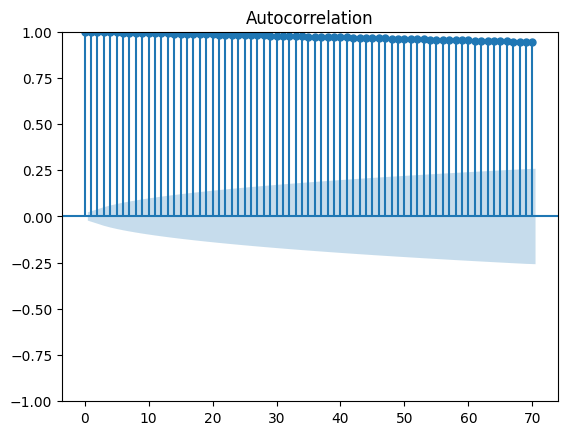

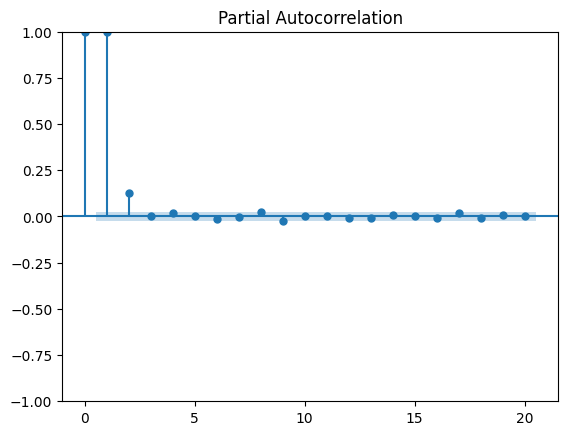

In [ ]:
1. Parameter Selection for ARIM
plt.figure(figsize=(10,9))
plot_acf(df, lags=70)
plot_pacf(df, lags=20)

In [ ]:
# # Based on ACF and PACF plots, select initial parameters (p, d, q)
p = 1
d = 1
q = 1

# **Model Building**

In [ ]:
model = ARIMA(df['Ex_rate'], order=(p, d, q))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28174.929
Date:                Sun, 08 Jun 2025   AIC                         -56343.859
Time:                        11:37:17   BIC                         -56323.056
Sample:                             0   HQIC                        -56336.720
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1219      0.046     -2.648      0.008      -0.212      -0.032
ma.L1         -0.0080      0.046     -0.173      0.863      -0.098       0.082
sigma2      3.483e-05   1.01e-07    345.721      0.000    3.46e-05     3.5e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2331465.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.81   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        88.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Plot diagnostics

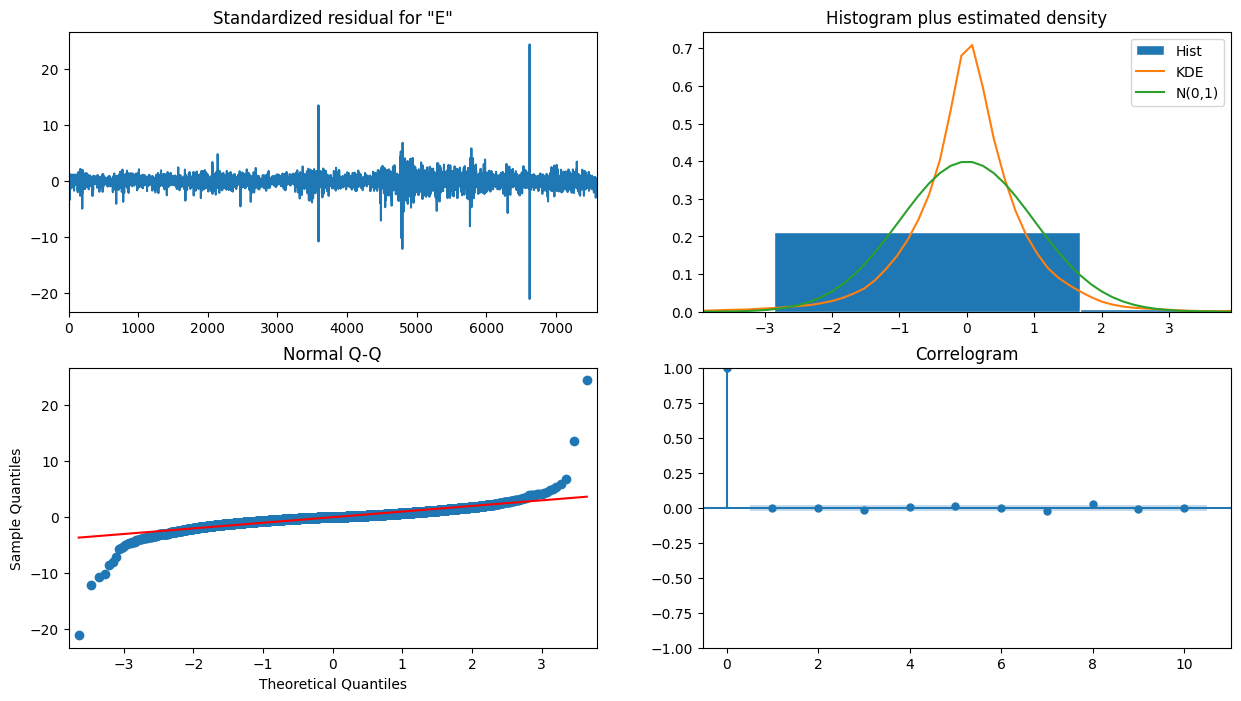

In [ ]:

model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

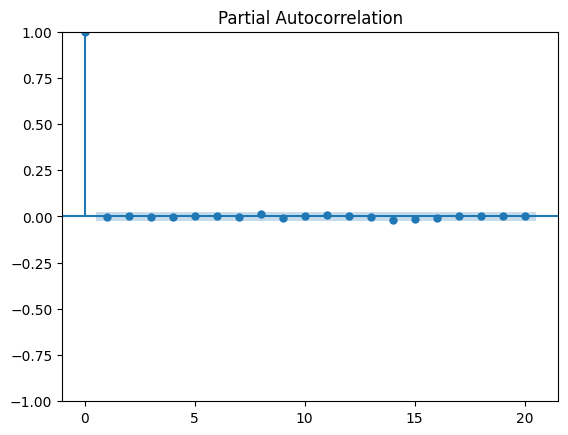

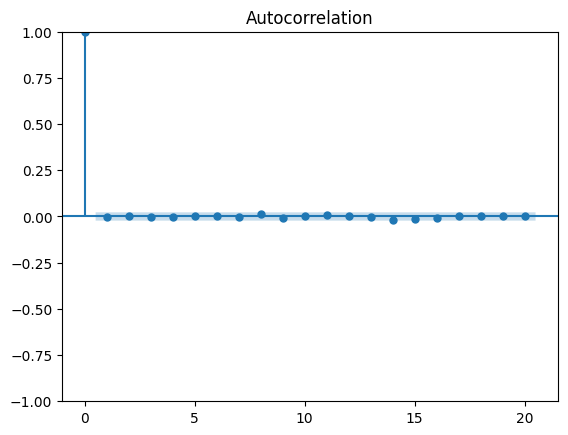

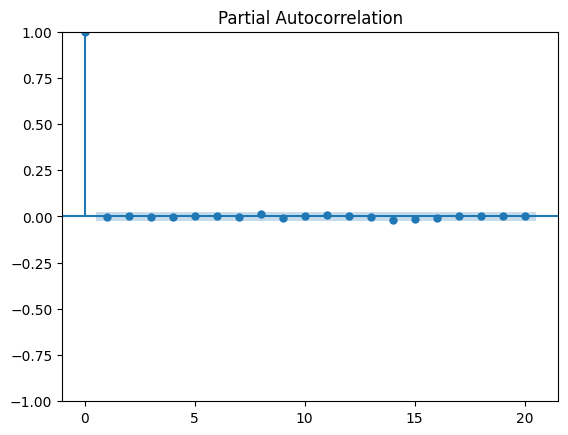

In [ ]:
residuals = model_fit.resid
plot_acf(residuals, lags=20)
plot_pacf(residuals, lags=20)

# Forecasting

In [ ]:

forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean
conf_int = forecast_result.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


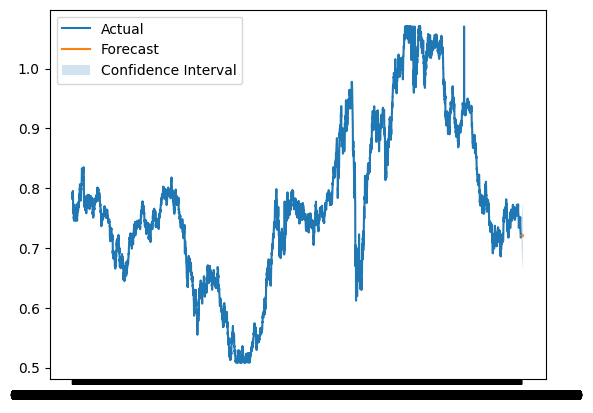

In [ ]:
# Visualize forecast
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(np.arange(len(df), len(df) + forecast_steps), forecast, label='Forecast')
plt.fill_between(np.arange(len(df), len(df) + forecast_steps), conf_int[conf_int.columns[0]], conf_int[conf_int.columns[1]], alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(df['Ex_rate'])
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(forecast_steps)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


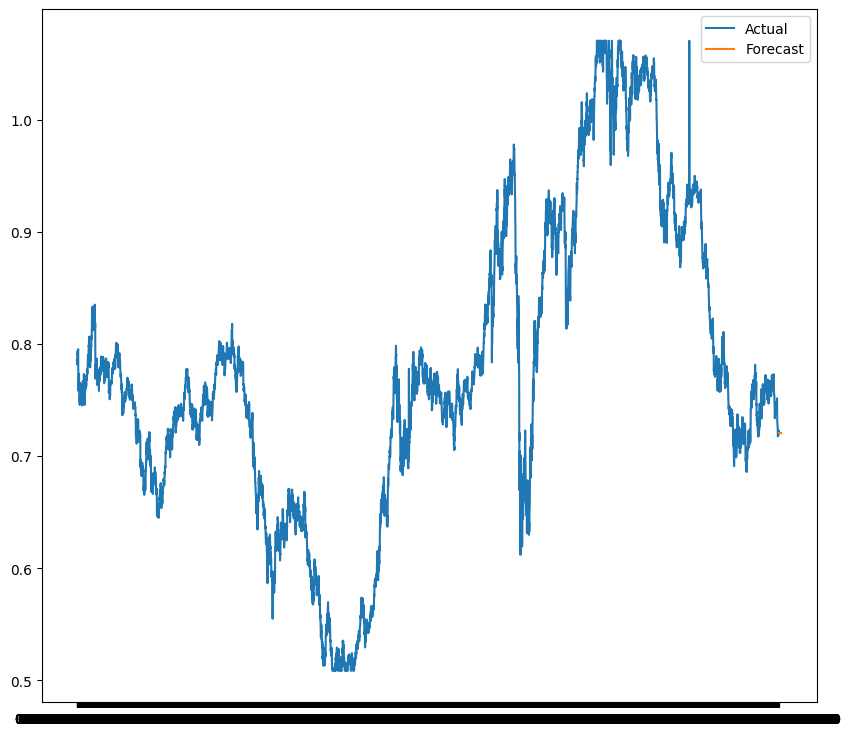

In [ ]:
# Visualize forecast
plt.figure(figsize=(10,9))

plt.plot(df['Ex_rate'], label='Actual')
plt.plot(np.arange(len(df), len(df) + forecast_steps), forecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Compute error metrics
mae_arima = mean_absolute_error(df['Ex_rate'], model_fit.forecast(steps=len(df)))
mae_es = mean_absolute_error(df['Ex_rate'], model_fit.forecast(steps=len(df)))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# **Evaluation**

In [ ]:

mae = mean_absolute_error(df['Ex_rate'][-30:], forecast)
mse = mean_squared_error(df['Ex_rate'][-30:], forecast)
mape = mean_absolute_percentage_error(df['Ex_rate'][-30:], forecast)

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('MAPE:', mape)

MAE: 0.012707819811781536
MSE: 0.00028758733498311894
MAPE: 0.01709757781686453
